# Семинар 5 (16.02) 

GWAS Catalog, eupedia, phenotype-Genotype Integrator, plink

[Содержание](https://docs.google.com/document/d/149yB8vDqIB7MpVmmHmpETgsrz2dCZSvecGoAHA58EOc/edit)

Мы уже работали с базами [dbSNP](https://www.ncbi.nlm.nih.gov/snp/), [SNPedia](https://www.snpedia.com/), где указана клиническая значимость снипов. Мы не рассматривали [GWAS Catalog](https://www.ebi.ac.uk/gwas/) (см лекцию). Нажмем на breast carcinoma, увидим разные ее типы. Тыкаем первый результат, видим тут кучу данных в таблице. 

Если посмотреть на выборку в таблице, то можно видеть, что почти все исследования проходят на европейцах

Кроме GWAS каталога, есть [ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/) для клинической значимости. Ищем в строке поиска breast carcinoma, открываем запись. Если перейти в Condition, будет информация по исследованию, но в GWAS больше данных.

Есть еще [Eupedia](https://www.eupedia.com/), это не совсем научный ресурс, но тут есть карты по гаплогруппам 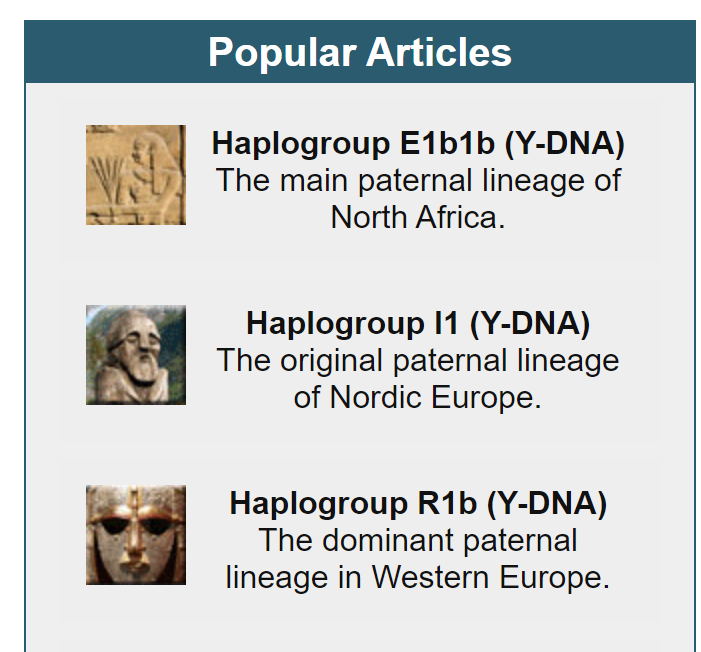

Выбираем первую запись

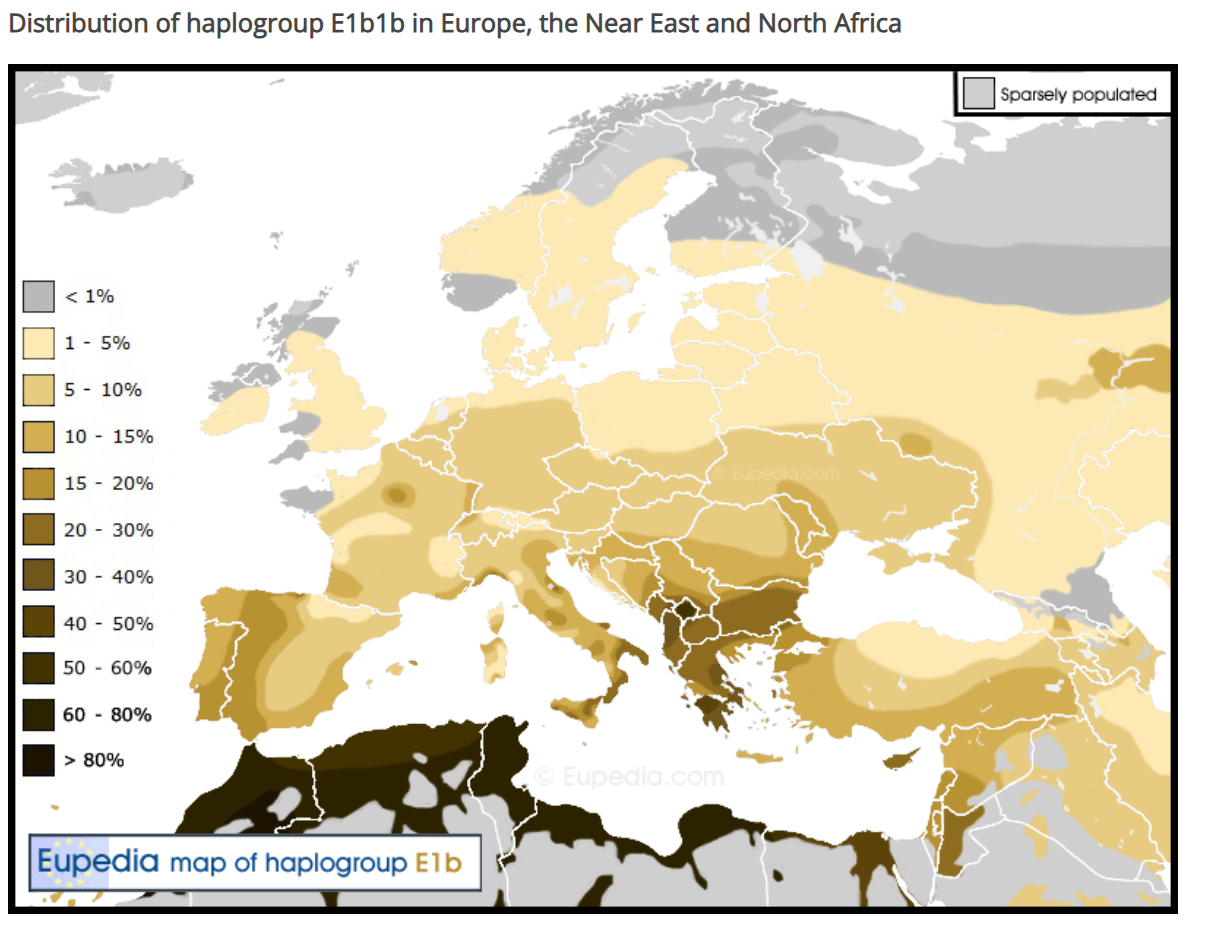

Гаплогруппа больше относится к северной части Африки.

Можем посмотреть на филогенетическое дерево гаплогруппы.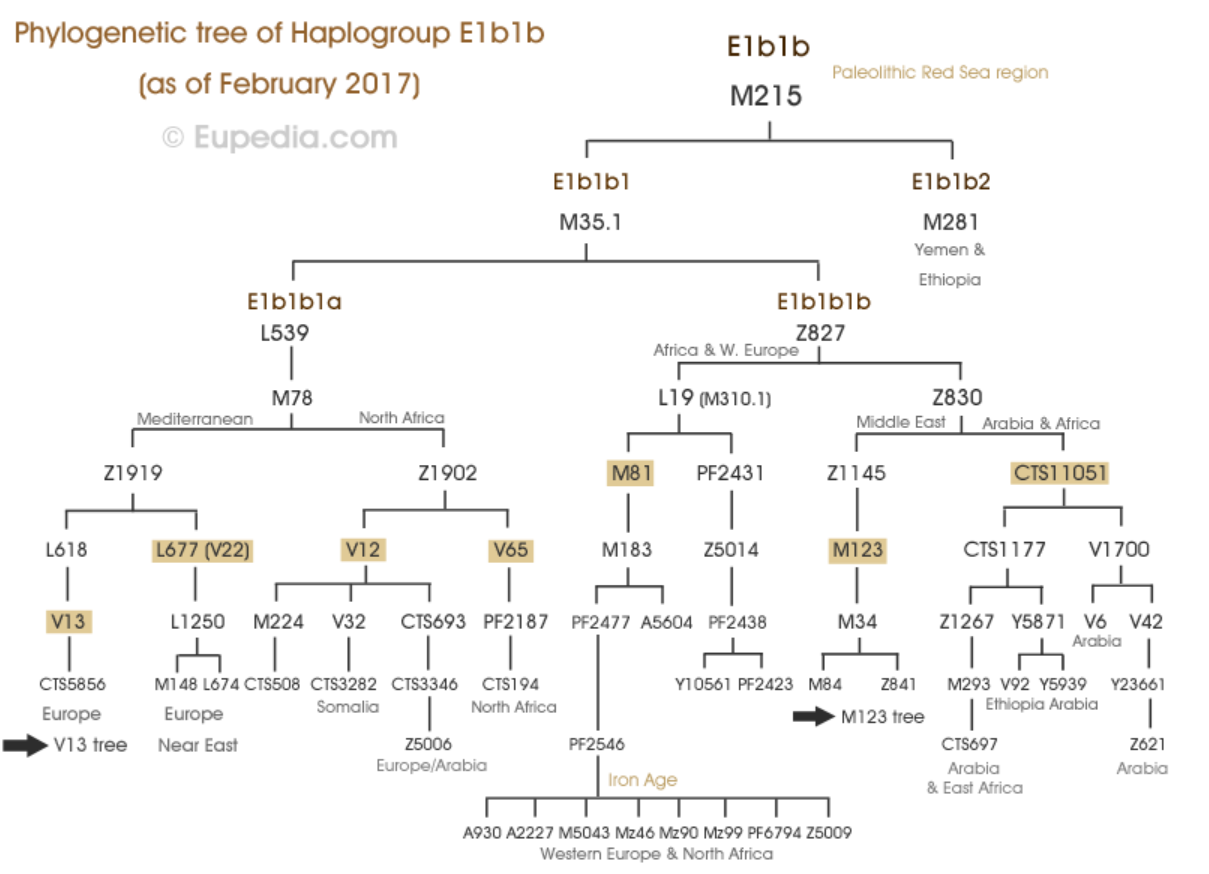

Так как мы считаем, что все люди произошли от одного человека, мы видим, что гаплогруппы связаны.

В строке поиска справа сверху вбиваем pushkin 
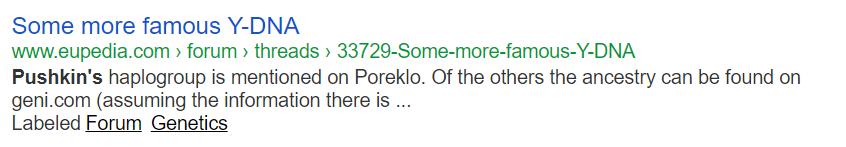

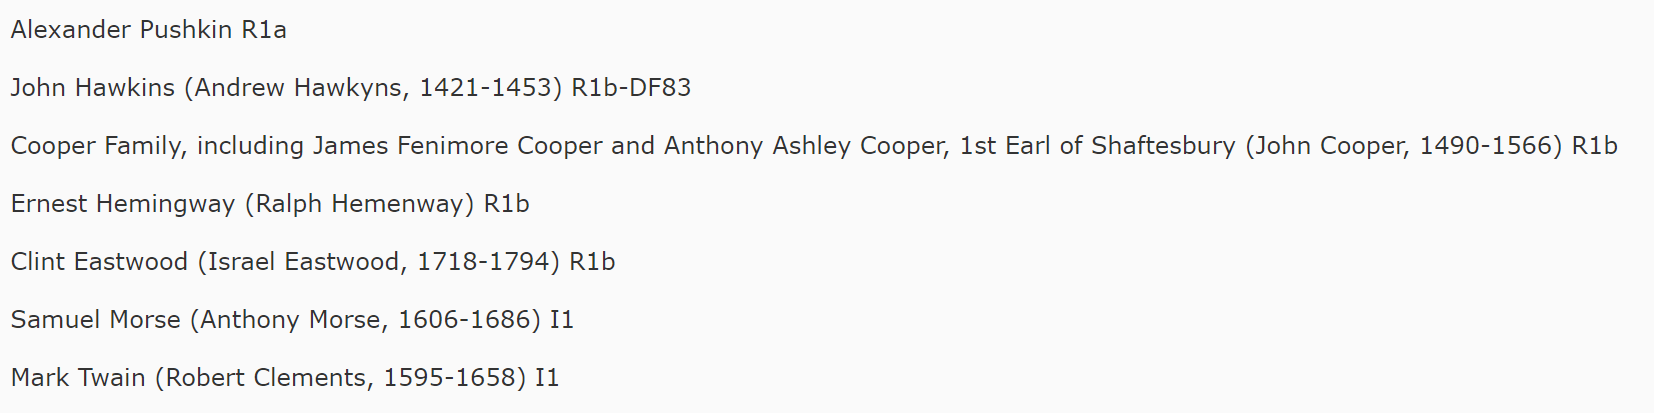

В поиске вбиваем R1a. По карте можно сделать вывод, что гаплогруппа распросранена в Европе

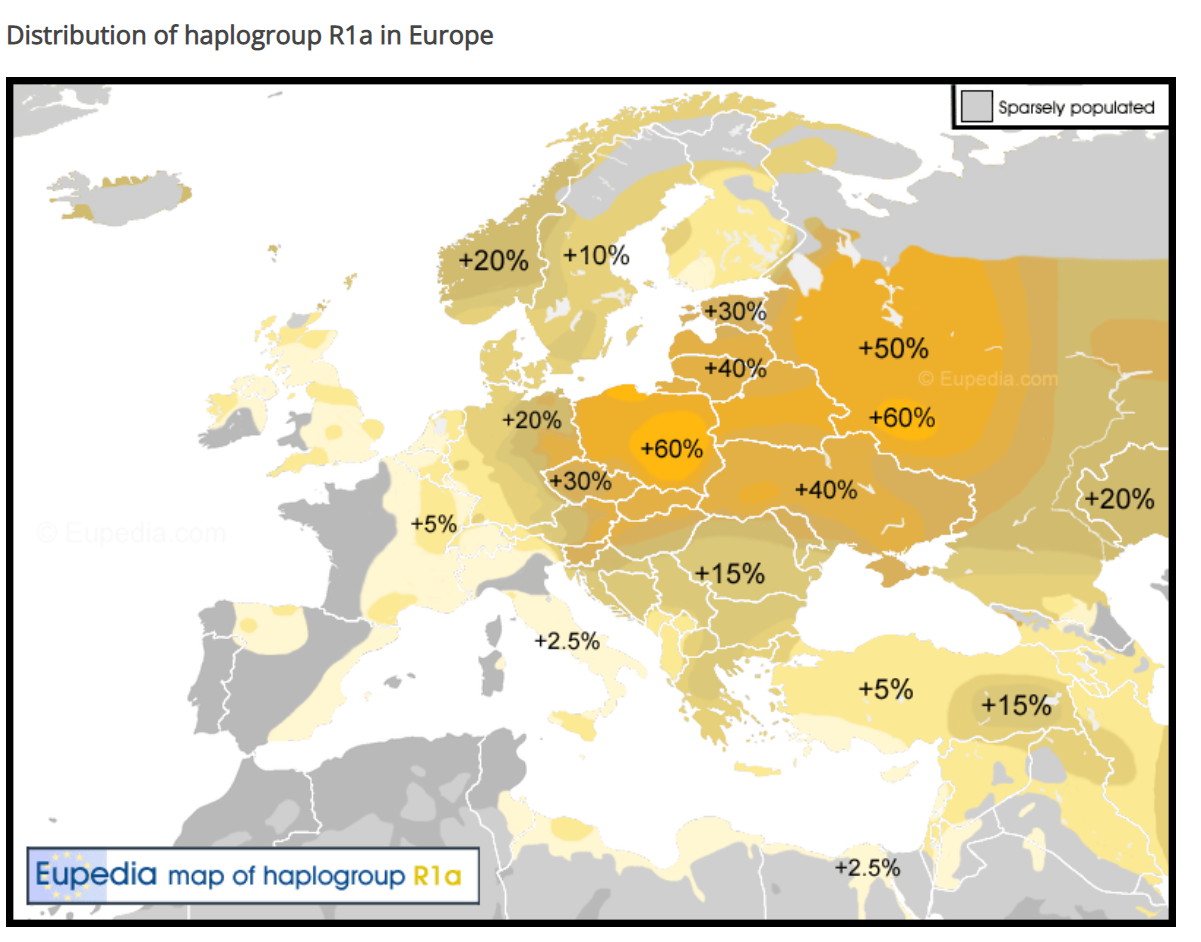

Можно рассматривать различные признаки (вторая строка сверху). Разделены митохондриальная ДНК и Y-хромосомы (первая передается только от матери, вторая - от отца). Есть еще аутосомные группы генов - все остальные. Так как непонятно, от кого они, сложнее рассматривать их происхождение, но все же такие группы тоже есть.

Тут также можно найти распределение по признакам, всякие карты (см панель слева)

## Смотрим [этот ноутбук](https://colab.research.google.com/drive/1Xc4yX18T-dH6wjolQKFHXKJuJZbaIdGV?usp=sharing)

В ноутбуке представлен небольшой анализ исследования данных из проекта [HapMap](https://www.ncbi.nlm.nih.gov/probe/docs/projhapmap/). Он содержит данные о гаплогруппах людей из Японии,США, Австралии. Мы хотим взять случайную выборку оттуда и посмотреть, как можно обрабатывать данные. Это можно делать с помощью [plink](https://www.cog-genomics.org/plink/1.9/). Это программа для обработки данных GWAS 

In [2]:
# Устанавливаем plink
# Качаем
!wget https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20210606.zip
# Распаковываем
!unzip -o plink_linux_x86_64_20210606.zip
# Удаляем лишнее
!rm -f plink_linux_x86_64_20210606.zip

--2022-05-07 23:04:48--  https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20210606.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.142.88
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.142.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8917076 (8.5M) [application/zip]
Saving to: ‘plink_linux_x86_64_20210606.zip’

plink_linux_x86_64_ 100%[===================>]   8.50M  44.9MB/s    in 0.2s    

2022-05-07 23:04:48 (44.9 MB/s) - ‘plink_linux_x86_64_20210606.zip’ saved [8917076/8917076]

Archive:  plink_linux_x86_64_20210606.zip
  inflating: plink                   
  inflating: LICENSE                 
  inflating: toy.ped                 
  inflating: toy.map                 
  inflating: prettify                


У нас есть несколько форматов генотипирования, plink на вход принимает 2 файла - .ped и .map. ped - файл состоит из 6 колонок:
-  id семьи
-  id внутри семьи (если в семье только 1 представитель, то может совпадать с id семьи)
-  id отца
-  id матери
-  пол (1 - male, 2 - female, 0 - не указан)
-  данные фенотипирования (1 - control (здоровый, либо частый признак), 2 - case(больной, лиюо редкий), или еще какие-то данные)

Дальше идут снипы. Если данных нет, то стоит 0, если есть - указывается аллель.


In [3]:
# Пример ped-файла
!cat toy.ped

1 1000000000 0 0 1 1 0 0 A A
1 1000000001 0 0 1 2 C C A G


В map-файлах содержится информация об отдельных снипах, и каждая строка - это отделый снип из ped-файла.

Столбцы:
-  id хромосомы
-  уникальный id снипа
-  Genomic distance (0 если не знаем)
-  позиция снипа

In [5]:
# Пример map-файла
!cat toy.map

1	rs0	0	1000
1	rs10	0	1001


In [6]:
# Скачиваем данные для работы - подвыборка из HapMap
!wget https://zzz.bwh.harvard.edu/plink/hapmap1.zip

--2022-05-07 23:12:53--  https://zzz.bwh.harvard.edu/plink/hapmap1.zip
Resolving zzz.bwh.harvard.edu (zzz.bwh.harvard.edu)... 170.223.191.141
Connecting to zzz.bwh.harvard.edu (zzz.bwh.harvard.edu)|170.223.191.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2914468 (2.8M) [application/zip]
Saving to: ‘hapmap1.zip’

hapmap1.zip         100%[===================>]   2.78M  11.0MB/s    in 0.3s    

2022-05-07 23:12:54 (11.0 MB/s) - ‘hapmap1.zip’ saved [2914468/2914468]



In [7]:
# Распаковка
!unzip -o hapmap1.zip

Archive:  hapmap1.zip
  inflating: hapmap1.ped             
  inflating: hapmap1.map             
  inflating: pop.phe                 
  inflating: qt.phe                  


В архиве есть ped- и map-файлы, а также pop.phe - файл с фенотипом (классификация по фенотипу на 2 кластера, для каждого человека из данной подвыборки оперделено, японец человек или китаец).

In [10]:
!head pop.phe

#HC - китаец, JP - японец

HCB181 1 1
HCB182 1 1
HCB183 1 1
HCB184 1 1
HCB185 1 1
HCB186 1 1
HCB187 1 1
HCB188 1 1
HCB189 1 1
HCB190 1 1


In [11]:
!./plink --file hapmap1 --make-bed --out hapmap1

# Хотим собрать данные в файлах и получить бинарный файл с информацией
# --file <prefix> - указываем префикс названий файлов
# --make-bed - что мы с файлами делаем
# --out <name> - куда выводить

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to hapmap1.log.
Options in effect:
  --file hapmap1
  --make-bed
  --out hapmap1

12986 MB RAM detected; reserving 6493 MB for main workspace.
.ped scan complete (for binary autoconversion).
Performing single-pass .bed write (83534 variants, 89 people).
--file: hapmap1-temporary.bed + hapmap1-temporary.bim + hapmap1-temporary.fam
written.
83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%3

В отчете написано, что делает и что получилось. У нас 83534 вариантов, 89 человек, у всех есть данные по фенотипам. Total genotyping rate обозначает то, сколько процентов данных по снипам присутствует в файле у всех людей (конкретно тут 83500 вариантов и 99% присутствуют данные). При исследовании на генотипипровании могут быть ошибки, либо у конкретного человека может отсутствовать какой-то вариант, и в файле будет стоять минус. 99% генотипирования - это хорошо. 

Данная команда создала несколько файлов:

-  .bed - бинарный файл, не файл с участками
-  .bim, .fam - текстовые файлы

In [15]:
!head hapmap1.bim

# Первые 6 колонок из .ped

1	rs6681049	0	1	1	2
1	rs4074137	0	2	1	2
1	rs7540009	0	3	0	2
1	rs1891905	0	4	1	2
1	rs9729550	0	5	1	2
1	rs3813196	0	6	1	2
1	rs6704013	0	7	0	2
1	rs307347	0	8	0	2
1	rs9439440	0	9	0	2
1	rs3128342	0	10	1	2


In [17]:
!head -n 3 hapmap1.ped

# Строка -это человек и все его снипы

HCB181 1 0 0 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 0 2 2 2 2 1 1 2 2 2 2 2 2 0 0 0 0 2 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 0 0 1 2 2 2 2 2 0 0 2 2 1 1 1 2 1 1 2 1 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 2 2 2 2 1 2 2 2 1 2 2 2 1 1 2 2 2 2 0 0 2 2 1 2 1 1 0 0 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 1 2 1 1 1 2 1 2 1 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 2 2 1 2 1 0 0 1 2 2 2 1 2 0 0 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 0 0 0 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 0 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 0 0 2 2 2 2 2 1 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 1 1 1 2 1 1 2 2 1 2 1 1 2 2 0 0 2 1 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 1 2 2 1 1 1 2 2 2 2 2 0 0 2 2 1 2 2 1 1 2 2 2 0 0 1 1 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 1 2 2 2

В bed-файле все вместе и перекодировано, чтобы быстрее читалось.

Так как не все данные нам подходят, мы можем фильтровать данные. МЫ можем отсеивать по частоте минорного аллеля, по проценту генотипирования и т.д

[Дока](https://www.cog-genomics.org/plink/1.9/filter)

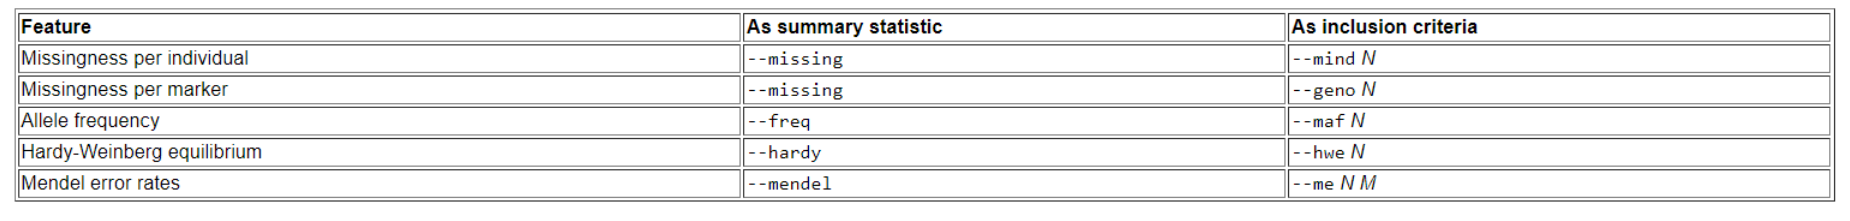

[Закон Харди-Вайнберга](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%A5%D0%B0%D1%80%D0%B4%D0%B8_%E2%80%94_%D0%92%D0%B0%D0%B9%D0%BD%D0%B1%D0%B5%D1%80%D0%B3%D0%B0)

Если у нас есть только 2 аллеля, их частоты обозначим как p и q. Возможные генотипы pp, pq, qp, qq. Частота генотипов должна быть равна 1. Отсюда $p^2+pq+q^2=1$.

Откуда могут быть ошибки? Плохая выборка, менделевские ошибки (у нас указаны id отца и матери, и если у отца и матери pp, а у сына qq, то это либо ошибка в составлении данных, либо это мутация, либо мы неправильно установили данные родителей).

Есть контроль по частоте аллелей (мы не хотим видеть совсем редкие). Если в каком то образце запороли большую часть гена, то его тоже лучше выкинуть. 



In [18]:
!./plink --file hapmap1 --make-bed --mind 0.05 --out highgeno

# Фильтруем по генотипированию - берем те у которых 95% данных есть

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to highgeno.log.
Options in effect:
  --file hapmap1
  --make-bed
  --mind 0.05
  --out highgeno

12986 MB RAM detected; reserving 6493 MB for main workspace.
.ped scan complete (for binary autoconversion).
Performing single-pass .bed write (83534 variants, 89 people).
--file: highgeno-temporary.bed + highgeno-temporary.bim +
highgeno-temporary.fam written.
83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
0 people removed due to missing genotype data (--mind).
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%

In [19]:
!head hapmap1.bim

# Смотрим bim-файл

1	rs6681049	0	1	1	2
1	rs4074137	0	2	1	2
1	rs7540009	0	3	0	2
1	rs1891905	0	4	1	2
1	rs9729550	0	5	1	2
1	rs3813196	0	6	1	2
1	rs6704013	0	7	0	2
1	rs307347	0	8	0	2
1	rs9439440	0	9	0	2
1	rs3128342	0	10	1	2


In [20]:
!head -n 3 hapmap1.ped

HCB181 1 0 0 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 0 2 2 2 2 1 1 2 2 2 2 2 2 0 0 0 0 2 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 0 0 1 2 2 2 2 2 0 0 2 2 1 1 1 2 1 1 2 1 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 2 2 2 2 1 2 2 2 1 2 2 2 1 1 2 2 2 2 0 0 2 2 1 2 1 1 0 0 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 1 2 1 1 1 2 1 2 1 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 2 2 1 2 1 0 0 1 2 2 2 1 2 0 0 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 0 0 0 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 0 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 0 0 2 2 2 2 2 1 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 1 1 1 2 1 1 2 2 1 2 1 1 2 2 0 0 2 1 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 1 2 2 1 1 1 2 2 2 2 2 0 0 2 2 1 2 2 1 1 2 2 2 0 0 1 1 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 1 2 2 2

In [21]:
!./plink --bfile hapmap1 --missing --out miss_stat

# Собираем статистику по отсутствующим данным
# --bfile <file> - файл, который рассматриваем
# --missing - хотим смотреть на пропуски
# --out <file> - аутпут

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to miss_stat.log.
Options in effect:
  --bfile hapmap1
  --missing
  --out miss_stat

12986 MB RAM detected; reserving 6493 MB for main workspace.
83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%61%62%63%64%65%66%67%68%69%70%

In [24]:
!head miss_stat.lmiss
# Относительно вариантов
# NMISS - число отсутствующих
# N_GENO - всего
# F_MISS - частота

 CHR         SNP   N_MISS   N_GENO   F_MISS
   1   rs6681049        0       89        0
   1   rs4074137        0       89        0
   1   rs7540009        0       89        0
   1   rs1891905        0       89        0
   1   rs9729550        0       89        0
   1   rs3813196        0       89        0
   1   rs6704013        2       89  0.02247
   1    rs307347       12       89   0.1348
   1   rs9439440        2       89  0.02247


In [25]:
!head miss_stat.imiss

# Относительно сэмплов (людей), строка - человек, остальное то же самое

     FID  IID MISS_PHENO   N_MISS   N_GENO   F_MISS
  HCB181    1          N      671    83534 0.008033
  HCB182    1          N     1156    83534  0.01384
  HCB183    1          N      498    83534 0.005962
  HCB184    1          N      412    83534 0.004932
  HCB185    1          N      329    83534 0.003939
  HCB186    1          N     1233    83534  0.01476
  HCB187    1          N      258    83534 0.003089
  HCB188    1          N      864    83534  0.01034
  HCB189    1          N      517    83534 0.006189


In [26]:
!./plink --bfile hapmap1 --freq --out freq_stat

# --freq - просим считать частоты

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to freq_stat.log.
Options in effect:
  --bfile hapmap1
  --freq
  --out freq_stat

12986 MB RAM detected; reserving 6493 MB for main workspace.
83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%61%62%63%64%65%66%67%68%69%70%

In [28]:
!head  freq_stat.frq

# В строке снип, CHR - хромосома, A1, A2 - аллели, MAF - частота минорного аллеля, NCHROBS - количество аллелей
# Есть MAF=0 - для данной выборки тут только 1 аллель, эти строки можно отфильтровать

 CHR         SNP   A1   A2          MAF  NCHROBS
   1   rs6681049    1    2       0.2135      178
   1   rs4074137    1    2      0.07865      178
   1   rs7540009    0    2            0      178
   1   rs1891905    1    2       0.4045      178
   1   rs9729550    1    2       0.1292      178
   1   rs3813196    1    2      0.02809      178
   1   rs6704013    0    2            0      174
   1    rs307347    0    2            0      154
   1   rs9439440    0    2            0      174


In [29]:
!./plink --bfile hapmap1 --freq --within pop.phe --out freq_stat

# Считаем статистику по фенотипам
# --within <phe-file>

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to freq_stat.log.
Options in effect:
  --bfile hapmap1
  --freq
  --out freq_stat
  --within pop.phe

12986 MB RAM detected; reserving 6493 MB for main workspace.
83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
--within: 2 clusters loaded, covering a total of 89 people.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%

In [31]:
!head freq_stat.frq.strat

# Такой же файл, CLST - кластер 
# В зависимости от кластера частоты разные

 CHR         SNP     CLST   A1   A2      MAF    MAC  NCHROBS
   1   rs6681049        1    1    2   0.2333     21       90 
   1   rs6681049        2    1    2   0.1932     17       88 
   1   rs4074137        1    1    2      0.1      9       90 
   1   rs4074137        2    1    2  0.05682      5       88 
   1   rs7540009        1    0    2        0      0       90 
   1   rs7540009        2    0    2        0      0       88 
   1   rs1891905        1    1    2   0.4111     37       90 
   1   rs1891905        2    1    2   0.3977     35       88 
   1   rs9729550        1    1    2   0.1444     13       90 


In [34]:
!./plink --bfile hapmap1 --snp rs6681049 --freq --within pop.phe --out snp1_frq_stat

# --snp <snp-id1, snp-id2> - берем конкретные снипы

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to snp1_frq_stat.log.
Options in effect:
  --bfile hapmap1
  --freq
  --out snp1_frq_stat
  --snp rs6681049
  --within pop.phe

12986 MB RAM detected; reserving 6493 MB for main workspace.
1 out of 83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
--within: 2 clusters loaded, covering a total of 89 people.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%

In [35]:
!head snp1_frq_stat.frq.strat

 CHR         SNP     CLST   A1   A2      MAF    MAC  NCHROBS
   1   rs6681049        1    1    2   0.2333     21       90 
   1   rs6681049        2    1    2   0.1932     17       88 


In [36]:
!./plink --bfile hapmap1 --snps rs6681049,rs1891905  --freq --within pop.phe --out snp1_frq_stat

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to snp1_frq_stat.log.
Options in effect:
  --bfile hapmap1
  --freq
  --out snp1_frq_stat
  --snps rs6681049,rs1891905
  --within pop.phe

12986 MB RAM detected; reserving 6493 MB for main workspace.
83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
--snps: 2 variants remaining.
--within: 2 clusters loaded, covering a total of 89 people.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%

In [37]:
!head snp1_frq_stat.frq.strat

 CHR         SNP     CLST   A1   A2      MAF    MAC  NCHROBS
   1   rs6681049        1    1    2   0.2333     21       90 
   1   rs6681049        2    1    2   0.1932     17       88 
   1   rs1891905        1    1    2   0.4111     37       90 
   1   rs1891905        2    1    2   0.3977     35       88 


## Тесты на ассоциацию

In [38]:
!./plink --bfile hapmap1 --assoc --out as1

# --assoc - ищем ассоциации

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to as1.log.
Options in effect:
  --assoc
  --bfile hapmap1
  --out as1

12986 MB RAM detected; reserving 6493 MB for main workspace.
83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%61%62%63%64%65%66%67%68%69%70%71%72%

In [39]:
!head as1.assoc

# A1 - первый аллель, A2 - второй, F_A и F_U - частоты, CHISQ - хи-квадрат, P - p-value, OR - odds ratio

 CHR         SNP         BP   A1      F_A      F_U   A2        CHISQ            P           OR 
   1   rs6681049          1    1   0.1591   0.2667    2        3.067      0.07991       0.5203 
   1   rs4074137          2    1  0.07955  0.07778    2     0.001919       0.9651        1.025 
   1   rs7540009          3    0        0        0    2           NA           NA           NA 
   1   rs1891905          4    1   0.4091      0.4    2      0.01527       0.9017        1.038 
   1   rs9729550          5    1   0.1705  0.08889    2        2.631       0.1048        2.106 
   1   rs3813196          6    1  0.03409  0.02222    2       0.2296       0.6318        1.553 
   1   rs6704013          7    0        0        0    2           NA           NA           NA 
   1    rs307347          8    0        0        0    2           NA           NA           NA 
   1   rs9439440          9    0        0        0    2           NA           NA           NA 


Хи-квадрат и p-value считается не всегда, так как отсутствуют данные об аллелях (мы их фильтровали до этого)

In [40]:
!sort -k 8 -nr as1.assoc | head

# Сортируем и выводим 10 лучших через head

  13   rs9585021      64274    1    0.625   0.2841    2        20.62    5.586e-06          4.2 
   2   rs2222162      10602    1   0.2841   0.6222    2        20.51    5.918e-06       0.2409 
   9  rs10810856      46335    1   0.2955  0.04444    2        20.01    7.723e-06        9.016 
   2   rs4675607      13220    1   0.1628   0.4778    2        19.93     8.05e-06       0.2125 
   2   rs4673349      13218    1   0.1818      0.5    2        19.83    8.485e-06       0.2222 
   2   rs1375352      13219    1   0.1818      0.5    2        19.83    8.485e-06       0.2222 
  21    rs219746      81525    1      0.5   0.1889    2        19.12    1.228e-05        4.294 
   1   rs4078404       6200    2      0.5      0.2    1        17.64    2.667e-05            4 
  14   rs1152431      66892    2   0.2727   0.5795    1        16.94    3.862e-05       0.2721 
  14   rs4899962      66836    2   0.3023   0.6111    1        16.88    3.983e-05       0.2758 


Подсчитанная ассоциация некорректированная. Мы берем кусок выборки, и нам могло повезти с данными.  

In [41]:
!./plink --bfile hapmap1 --assoc --adjust --out as2

# --adjust - корректировка 

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to as2.log.
Options in effect:
  --adjust
  --assoc
  --bfile hapmap1
  --out as2

12986 MB RAM detected; reserving 6493 MB for main workspace.
83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%61%62%63%64%65%66%67%68%69%70%

In [44]:
!head as2.assoc.adjusted

# p-value откорректированы 6 способами, мы рассматривали BONF, когда происходит деление на количество сэмплов
# p-value ухудшились
# BONF простая, но часто сильно корректирует. Часто используется FDR_BH

 CHR         SNP      UNADJ         GC       BONF       HOLM   SIDAK_SS   SIDAK_SD     FDR_BH     FDR_BY
  13   rs9585021  5.586e-06  4.994e-05     0.3839     0.3839     0.3188     0.3188    0.09719          1 
   2   rs2222162  5.918e-06  5.232e-05     0.4068     0.4067     0.3342     0.3342    0.09719          1 
   9  rs10810856  7.723e-06  6.483e-05     0.5308     0.5308     0.4118     0.4118    0.09719          1 
   2   rs4675607   8.05e-06  6.703e-05     0.5533     0.5533     0.4249     0.4249    0.09719          1 
   2   rs4673349  8.485e-06  6.994e-05     0.5832     0.5831     0.4419     0.4419    0.09719          1 
   2   rs1375352  8.485e-06  6.994e-05     0.5832     0.5831     0.4419     0.4419    0.09719          1 
  21    rs219746  1.228e-05  9.422e-05     0.8442     0.8441     0.5701     0.5701     0.1206          1 
   1   rs4078404  2.667e-05   0.000176          1          1     0.8401       0.84     0.2291          1 
  14   rs1152431  3.862e-05  0.0002374         

Таким образом, значимых ассоциаций мы не нашли в выборке.

In [45]:
!./plink --bfile hapmap1 --pheno pop.phe --assoc --adjust --out as3

# Учитываем фенотип

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to as3.log.
Options in effect:
  --adjust
  --assoc
  --bfile hapmap1
  --out as3
  --pheno pop.phe

12986 MB RAM detected; reserving 6493 MB for main workspace.
83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%61%62%63%64%65%66%6

In [46]:
!head as3.assoc.adjusted

 CHR         SNP      UNADJ         GC       BONF       HOLM   SIDAK_SS   SIDAK_SD     FDR_BH     FDR_BY
   8   rs2585179  2.694e-08  3.216e-05   0.001852   0.001852    0.00185    0.00185   0.001852    0.02169 
  11  rs10768140  6.778e-08  5.448e-05   0.004658   0.004658   0.004647   0.004647   0.002329    0.02728 
  15   rs4468542  1.154e-07  7.386e-05   0.007931    0.00793   0.007899   0.007899   0.002644    0.03097 
   6    rs372440  6.924e-07  0.0002061    0.04759    0.04758    0.04647    0.04647    0.01082     0.1268 
   6   rs9395476  1.102e-06  0.0002692    0.07577    0.07576    0.07297    0.07296    0.01082     0.1268 
   6    rs512497  1.102e-06  0.0002692    0.07577    0.07576    0.07297    0.07296    0.01082     0.1268 
   6    rs520599  1.102e-06  0.0002692    0.07577    0.07576    0.07297    0.07296    0.01082     0.1268 
   2  rs12373694  2.457e-06  0.0004265     0.1688     0.1688     0.1554     0.1553    0.02094     0.2454 
   8   rs2174875  2.743e-06  0.0004544     0.18

Получилось, что верхние 4 в зависимости от способа корректировки стали значимые. Нужно помнить, что внутри выборки могут быть значимые признаки, и если мы раскидаем данные по этим признакам, то сможем обнаружить ассоциации. Можно делить выборку по полу, возрасту.

In [47]:
!./plink --bfile hapmap1 --model --snp rs2222162 --out mod1

# --model - мы хотим увидеть доминантный и рецессивный ген

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to mod1.log.
Options in effect:
  --bfile hapmap1
  --model
  --out mod1
  --snp rs2222162

12986 MB RAM detected; reserving 6493 MB for main workspace.
1 out of 83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%61%62%63%64%65%66%67%

In [48]:
!head mod1.model

# NA стоит там, где получились маленькие числа, они отфильтровались

 CHR         SNP   A1   A2     TEST            AFF          UNAFF        CHISQ   DF            P
   2   rs2222162    1    2     GENO        3/19/22        17/22/6           NA   NA           NA
   2   rs2222162    1    2    TREND          25/63          56/34        19.15    1    1.207e-05
   2   rs2222162    1    2  ALLELIC          25/63          56/34        20.51    1    5.918e-06
   2   rs2222162    1    2      DOM          22/22           39/6           NA   NA           NA
   2   rs2222162    1    2      REC           3/41          17/28           NA   NA           NA


In [49]:
!./plink --bfile hapmap1 --cell 0 --model --snp rs2222162 --out mod1
!head mod1.model

# --cell 0 - указываем минимальное число для подсчета данных в таблице

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to mod1.log.
Options in effect:
  --bfile hapmap1
  --cell 0
  --model
  --out mod1
  --snp rs2222162

12986 MB RAM detected; reserving 6493 MB for main workspace.
1 out of 83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%61%62%63%64%65%6

Фильтрация нужна, потому что хи-квадрат на малых числах ведет себя плохо

## Манхэттенский график 

In [50]:
!pip install bioinfokit

# Загружаем бибилиотеку

     |████████████████████████████████| 84 kB 2.7 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=6e6e89bc3c252881d5a0dc9c2b89359f91d2b66a001849fc33a18de805811610
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=82e770ac0a325a280faba22847dab129ae9e2a20fda9a314f26f15b1546971d5
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [52]:
from bioinfokit import analys, visuz
import pandas as pd

In [55]:
df=pd.read_csv("as3.assoc",sep="\s* ")

# Через pandas импортируем данные как dataframe, ставим сепаратор пробелы

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [56]:
df.head()

CHR        SNP  BP  A1      F_A     F_U  A2    CHISQ       P      OR
0    1  rs6681049   1   1  0.19320  0.2333   2  0.42720  0.5134  0.7867
1    1  rs4074137   2   1  0.05682  0.1000   2  1.14500  0.2846  0.5422
2    1  rs7540009   3   0  0.00000  0.0000   2      NaN     NaN     NaN
3    1  rs1891905   4   1  0.39770  0.4111   2  0.03309  0.8557  0.9459
4    1  rs9729550   5   1  0.11360  0.1444   2  0.37530  0.5401  0.7594

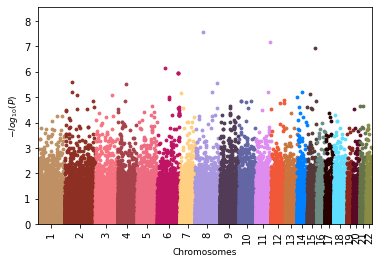

In [58]:
visuz.marker.mhat(df=df, chr='CHR',pv='P',show=True)

# Рисуем график

По оси y - минус логарифм от p-value, по x - хромосома

In [59]:
df2=pd.read_csv("as3.assoc.adjusted",sep="\s* ")

# Берем фенотипированные данные

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [60]:
df2.head()

CHR         SNP         UNADJ        GC      BONF      HOLM  SIDAK_SS  \
0    8   rs2585179  2.694000e-08  0.000032  0.001852  0.001852  0.001850   
1   11  rs10768140  6.778000e-08  0.000054  0.004658  0.004658  0.004647   
2   15   rs4468542  1.154000e-07  0.000074  0.007931  0.007930  0.007899   
3    6    rs372440  6.924000e-07  0.000206  0.047590  0.047580  0.046470   
4    6   rs9395476  1.102000e-06  0.000269  0.075770  0.075760  0.072970   

   SIDAK_SD    FDR_BH   FDR_BY  
0  0.001850  0.001852  0.02169  
1  0.004647  0.002329  0.02728  
2  0.007899  0.002644  0.03097  
3  0.046470  0.010820  0.12680  
4  0.072960  0.010820  0.12680

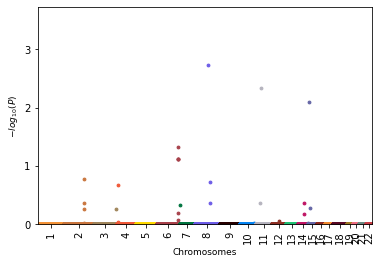

In [61]:
visuz.marker.mhat(df=df2, chr='CHR',pv='BONF',show=True)

Done. 